# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

(Please insert the background here )


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [86]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [87]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [88]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [91]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    11/26/2020
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/11-26-2020">
     14,090.70769
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/11-26-2020">
     USD IDR rate for 11/26/2020
    </a>
   </td>
  </tr>
  <tr>
   <td>
    11/25/2020
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/R


In [92]:
tr = table.find_all('tr')
tr[:2]

[<tr><td>11/26/2020</td><td>Thursday</td><td><a href="/Rate/USD/IDR/11-26-2020">14,090.70769</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/11-26-2020">USD IDR rate for 11/26/2020</a></td></tr>,
 <tr><td>11/25/2020</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/11-25-2020">14,136.09929</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/11-25-2020">USD IDR rate for 11/25/2020</a></td></tr>]

Do the scrapping process here (please change this markdown with your explanation)

In [93]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    period = row.find_all('td')[0].text
    period = period.strip()
    
    harga = row.find_all('td')[2].text
    harga= harga.strip()
    
    temp.append((period, harga))

    #scrapping process
    
temp 

[('11/25/2020', '14,136.09929 IDR'),
 ('11/24/2020', '14,137.48161 IDR'),
 ('11/23/2020', '14,185.57119 IDR'),
 ('11/20/2020', '14,162.60519 IDR'),
 ('11/19/2020', '14,165.50144 IDR'),
 ('11/18/2020', '14,051.29503 IDR'),
 ('11/17/2020', '14,040.16051 IDR'),
 ('11/16/2020', '14,085.69501 IDR'),
 ('11/13/2020', '14,142.77143 IDR'),
 ('11/12/2020', '14,141.24303 IDR'),
 ('11/11/2020', '14,073.46024 IDR'),
 ('11/10/2020', '14,053.76135 IDR'),
 ('11/9/2020', '14,283.29667 IDR'),
 ('11/6/2020', '14,214.49744 IDR'),
 ('11/5/2020', '14,389.14027 IDR'),
 ('11/4/2020', '14,544.44634 IDR'),
 ('11/3/2020', '14,589.01774 IDR'),
 ('11/2/2020', '14,612.89990 IDR'),
 ('10/30/2020', '14,629.16216 IDR'),
 ('10/29/2020', '14,701.62361 IDR'),
 ('10/28/2020', '14,701.92586 IDR'),
 ('10/27/2020', '14,649.78960 IDR'),
 ('10/26/2020', '14,652.88010 IDR'),
 ('10/23/2020', '14,655.04157 IDR'),
 ('10/22/2020', '14,647.90877 IDR'),
 ('10/21/2020', '14,641.61060 IDR'),
 ('10/20/2020', '14,555.88071 IDR'),
 ('10/1

## Creating data frame & Data wrangling

Put the array into dataframe

In [99]:
import pandas as pd

df = pd.DataFrame(temp, columns= ('Tanggal', 'Harga'))
df.head()
df.dtypes

Tanggal    object
Harga      object
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

Komponen kolom tanggal diubah menjadi 'datetime64' lalu untuk kolom harga, string 'IDR' dan ',' dihilangkan terlebih dahulu lalu diubah menjadi bentuk float

In [100]:
df['Tanggal'] = df['Tanggal'].astype('datetime64')
df['Harga'] = df['Harga'].str.replace('IDR', '')
df['Harga'] = df['Harga'].str.replace(',', '')
df['Harga'] = df['Harga'].astype('float64')




Mengatur index dataframe menjadi kolom tanggal

In [96]:
df.head()

,Tanggal,Harga
0,2020-11-25,14136.09929
1,2020-11-24,14137.48161
2,2020-11-23,14185.57119
3,2020-11-20,14162.60519
4,2020-11-19,14165.50144


In [101]:
df = df.set_index('Tanggal')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='Tanggal'>

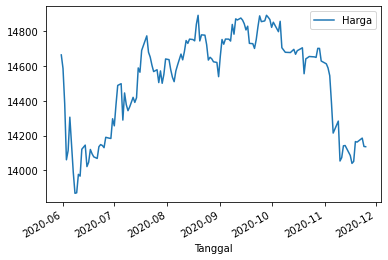

In [102]:
df.plot()

Berdasarkan grafik diatas, dapat terlihat terjadi kenaikan harga kurs dollar mulai awal Juni tahun 2020. Tren kenaikan tersebut terus terjadi hingga pertengahan Oktober 2020 lalu terlihat terjadi penurunan harga kurs dollar

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.